In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import pywt
import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')
import models.DWT2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
# for the DWT layer you can use any of the wavelets listed in here
print(pywt.wavelist(kind = 'discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [6]:
nb_classes = 10
batch_size = 32
epochs = 30

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Remove images to get smaller dataset
# x_train = x_train[:1000, :, :]
# y_train = y_train[:1000]
# x_test = x_test[:500, :, :]
# y_test = y_test[:500]


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [7]:
# load DWT db2 model
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(models.DWT2.DWT(name="sym13"))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(models.DWT2.DWT(name="bior3.5"))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(nb_classes, activation="softmax"))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dwt_sym13 (DWT)              (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        73792     
_________________________________________________________________
dwt_1_bior3.5 (DWT)          (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       295040    
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_______________________________________

In [5]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [6]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 22s - loss: 1.6531 - acc: 0.4958 - val_loss: 0.5718 - val_acc: 0.8584
Epoch 2/30
48000/48000 - 21s - loss: 0.5844 - acc: 0.8183 - val_loss: 0.3551 - val_acc: 0.8986
Epoch 3/30
48000/48000 - 21s - loss: 0.4293 - acc: 0.8707 - val_loss: 0.2870 - val_acc: 0.9182
Epoch 4/30
48000/48000 - 21s - loss: 0.3572 - acc: 0.8929 - val_loss: 0.2469 - val_acc: 0.9283
Epoch 5/30
48000/48000 - 21s - loss: 0.3104 - acc: 0.9080 - val_loss: 0.2151 - val_acc: 0.9384
Epoch 6/30
48000/48000 - 21s - loss: 0.2780 - acc: 0.9179 - val_loss: 0.1908 - val_acc: 0.9464
Epoch 7/30
48000/48000 - 21s - loss: 0.2486 - acc: 0.9266 - val_loss: 0.1732 - val_acc: 0.9512
Epoch 8/30
48000/48000 - 20s - loss: 0.2289 - acc: 0.9329 - val_loss: 0.1595 - val_acc: 0.9553
Epoch 9/30
48000/48000 - 21s - loss: 0.2115 - acc: 0.9376 - val_loss: 0.1487 - val_acc: 0.9588
Epoch 10/30
48000/48000 - 20s - loss: 0.1962 - acc: 0.9410 - val_loss: 0.1378 - val_acc: 0.9610

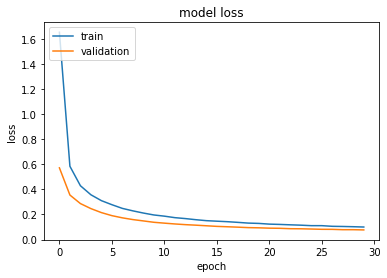

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()